In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import numpy as np
from scipy.interpolate import griddata

import os

In [40]:
# 読み込み
file_path = "../output/52364657_bldg_6697_op/building/bldg_7cdc129f-3693-4fde-baf7-af6a7fa13d8c.csv"

# df にする
df = pd.read_csv(file_path)

# lod ごとに分ける "lod" = 0 , 1
lod_0_df = df[df['lod'] == 0]
lod_1_df = df[df['lod'] == 1]

# 最初の値をコピーして最後の値に追加
lod_0_df = pd.concat([lod_0_df, lod_0_df.iloc[0:1, :]], axis=0)
lod_1_df = pd.concat([lod_1_df, lod_1_df.iloc[0:1, :]], axis=0)

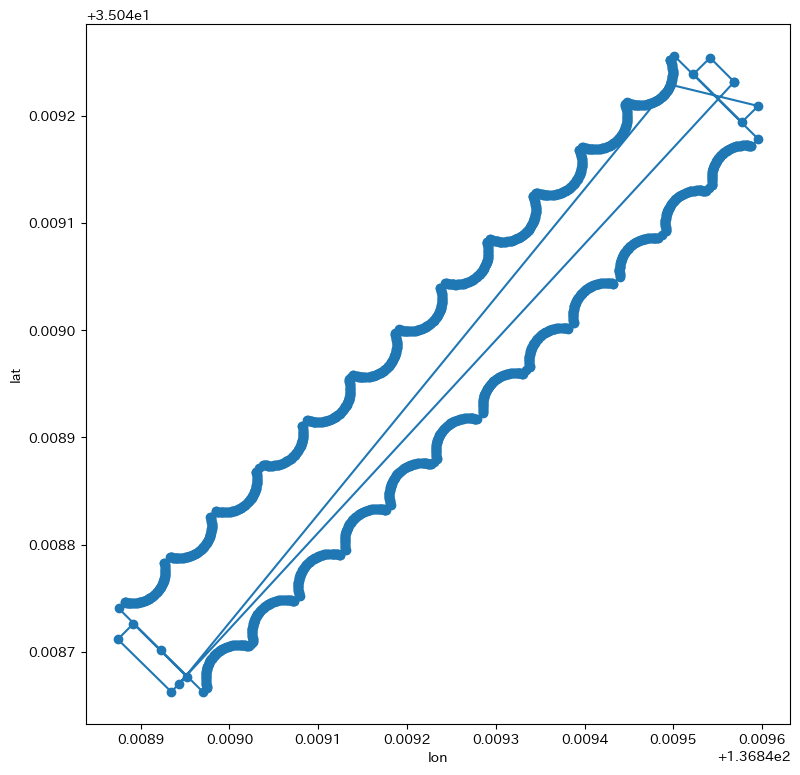

In [41]:
# lat と lon で散布図を描く
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 2, 1)
ax.plot(lod_0_df['lon'], lod_0_df['lat'], 'o-')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
plt.show()

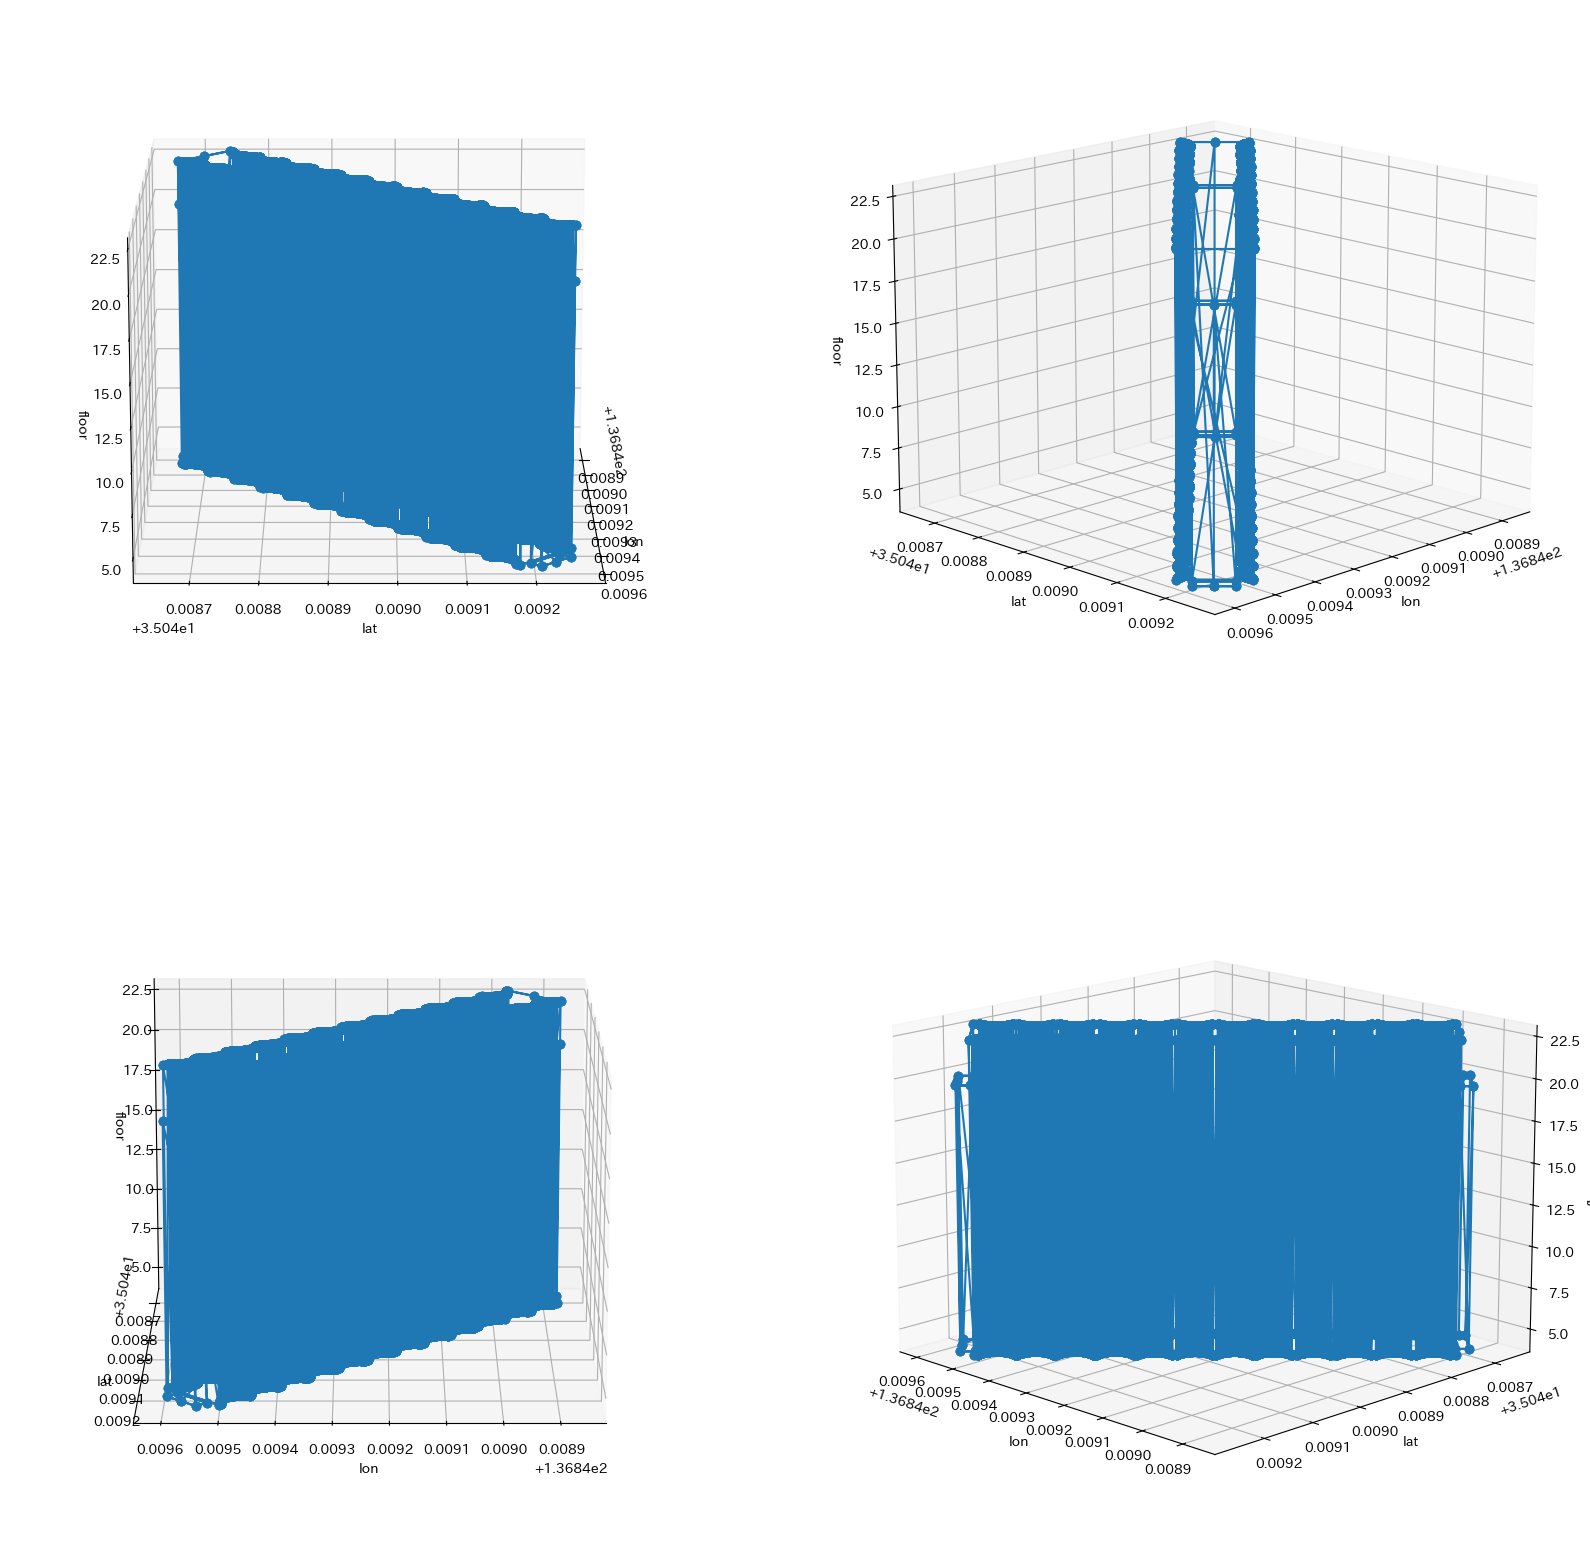

In [44]:
# %matplotlib notebook

# lat と lon で散布図を描く
fig = plt.figure(figsize=(20, 20))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.plot(lod_1_df['lon'], lod_1_df['lat'],lod_1_df['height'], 'o-')
    
    ax.set_xlabel('lon')
    ax.set_ylabel('lat')
    ax.set_zlabel('floor')
    ax.view_init(azim=0+i*45, elev=15)
plt.show()

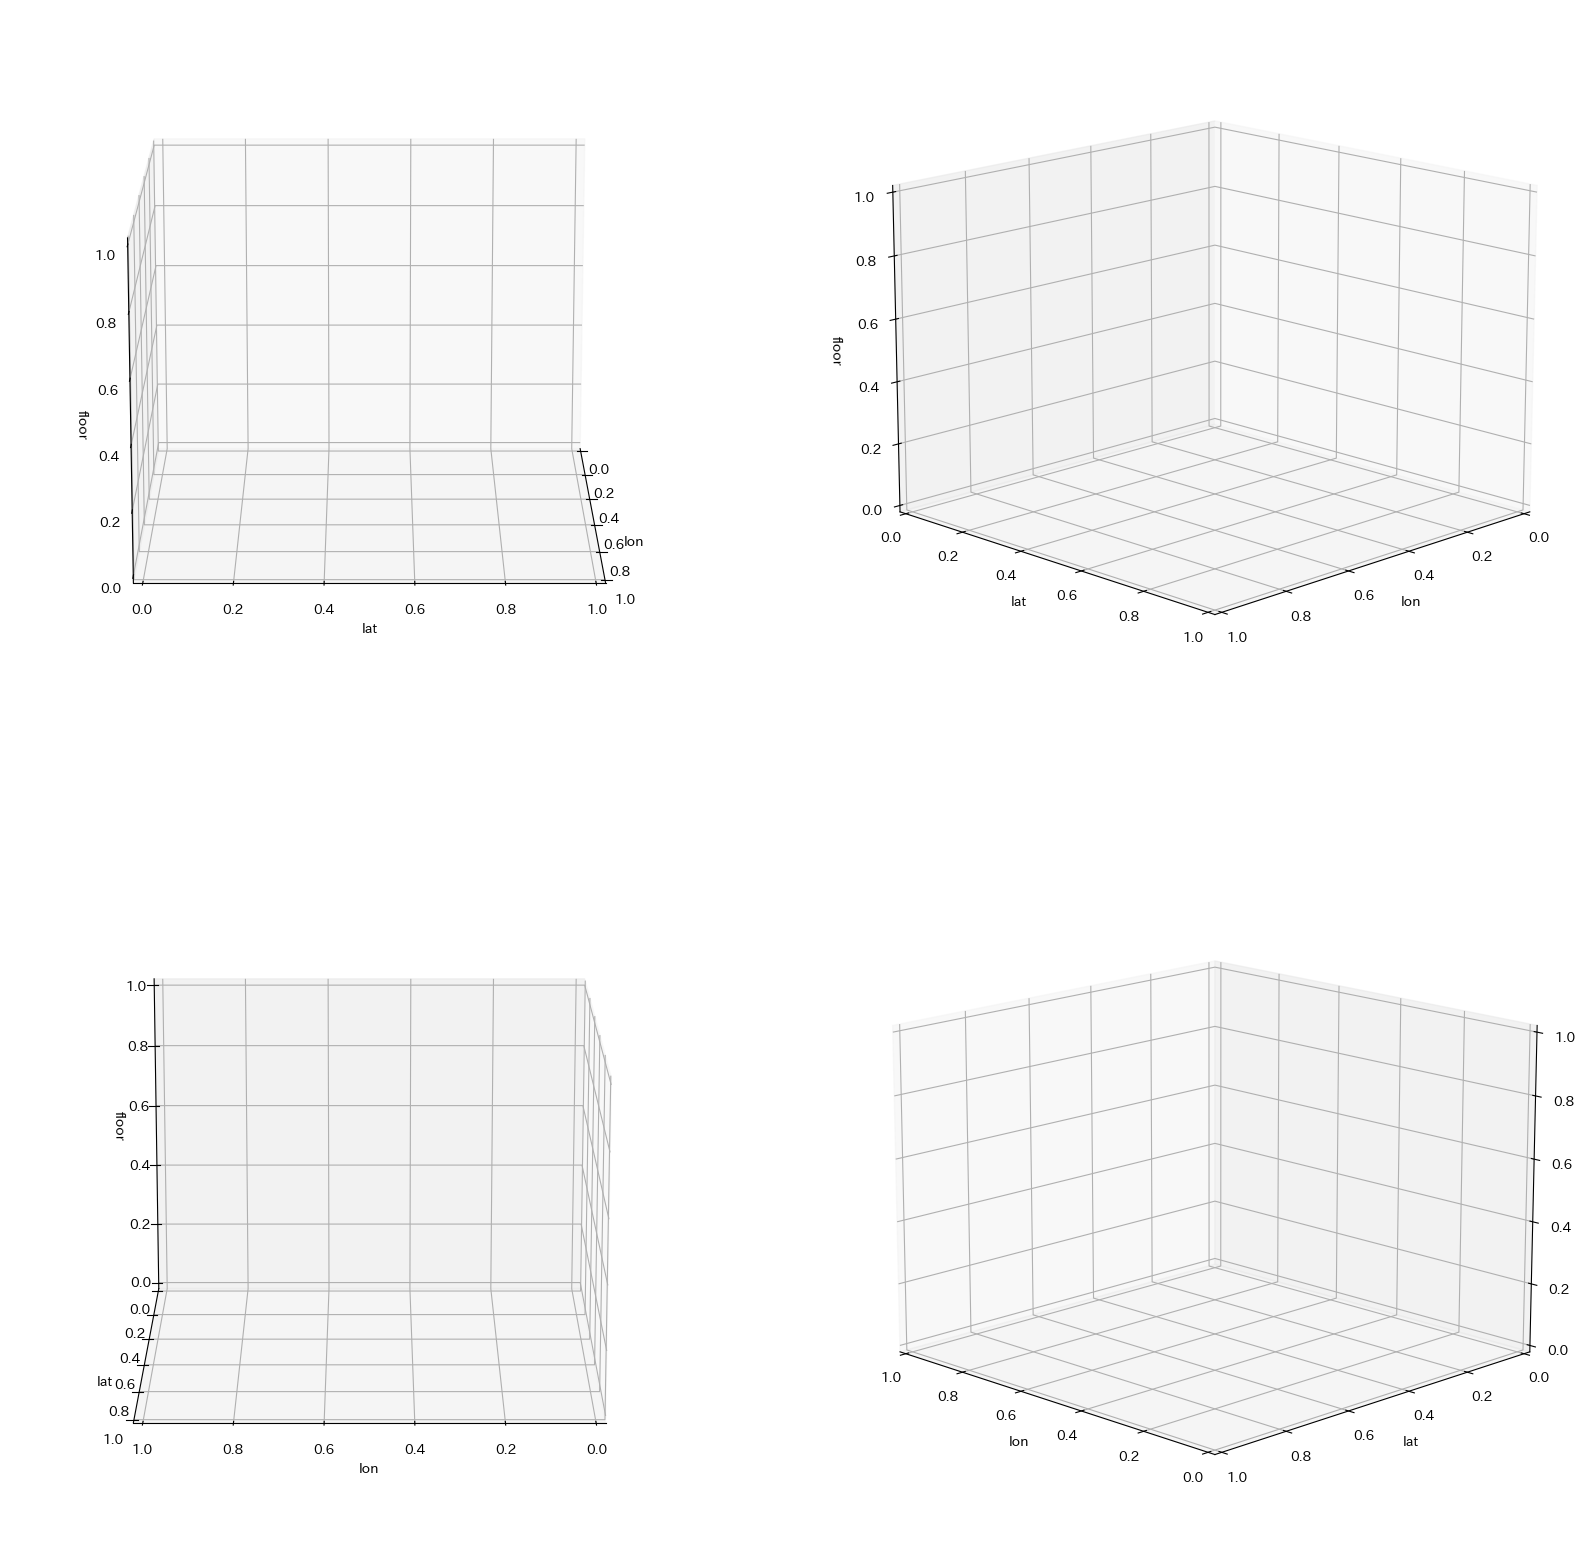

In [31]:
# ../output/building/bldg_0c836439-60bb-4951-a7bf-d057f9cf37e5.csv
dir_path = "../output/building/"
files = os.listdir(dir_path)

# lat と lon で散布図を描く
fig = plt.figure(figsize=(20, 20))
n = 0

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    for file in files:
        df = pd.read_csv(dir_path + file)
        lod_0_df = df[df['lod'] == 0]
        ax.plot(lod_0_df['lon'], lod_0_df['lat'],lod_0_df['height'], '.-')
        n += 1
        if n == 5:
            break
    ax.set_xlabel('lon')
    ax.set_ylabel('lat')
    ax.set_zlabel('floor')
    ax.view_init(azim=0+i*45, elev=15)

plt.show()

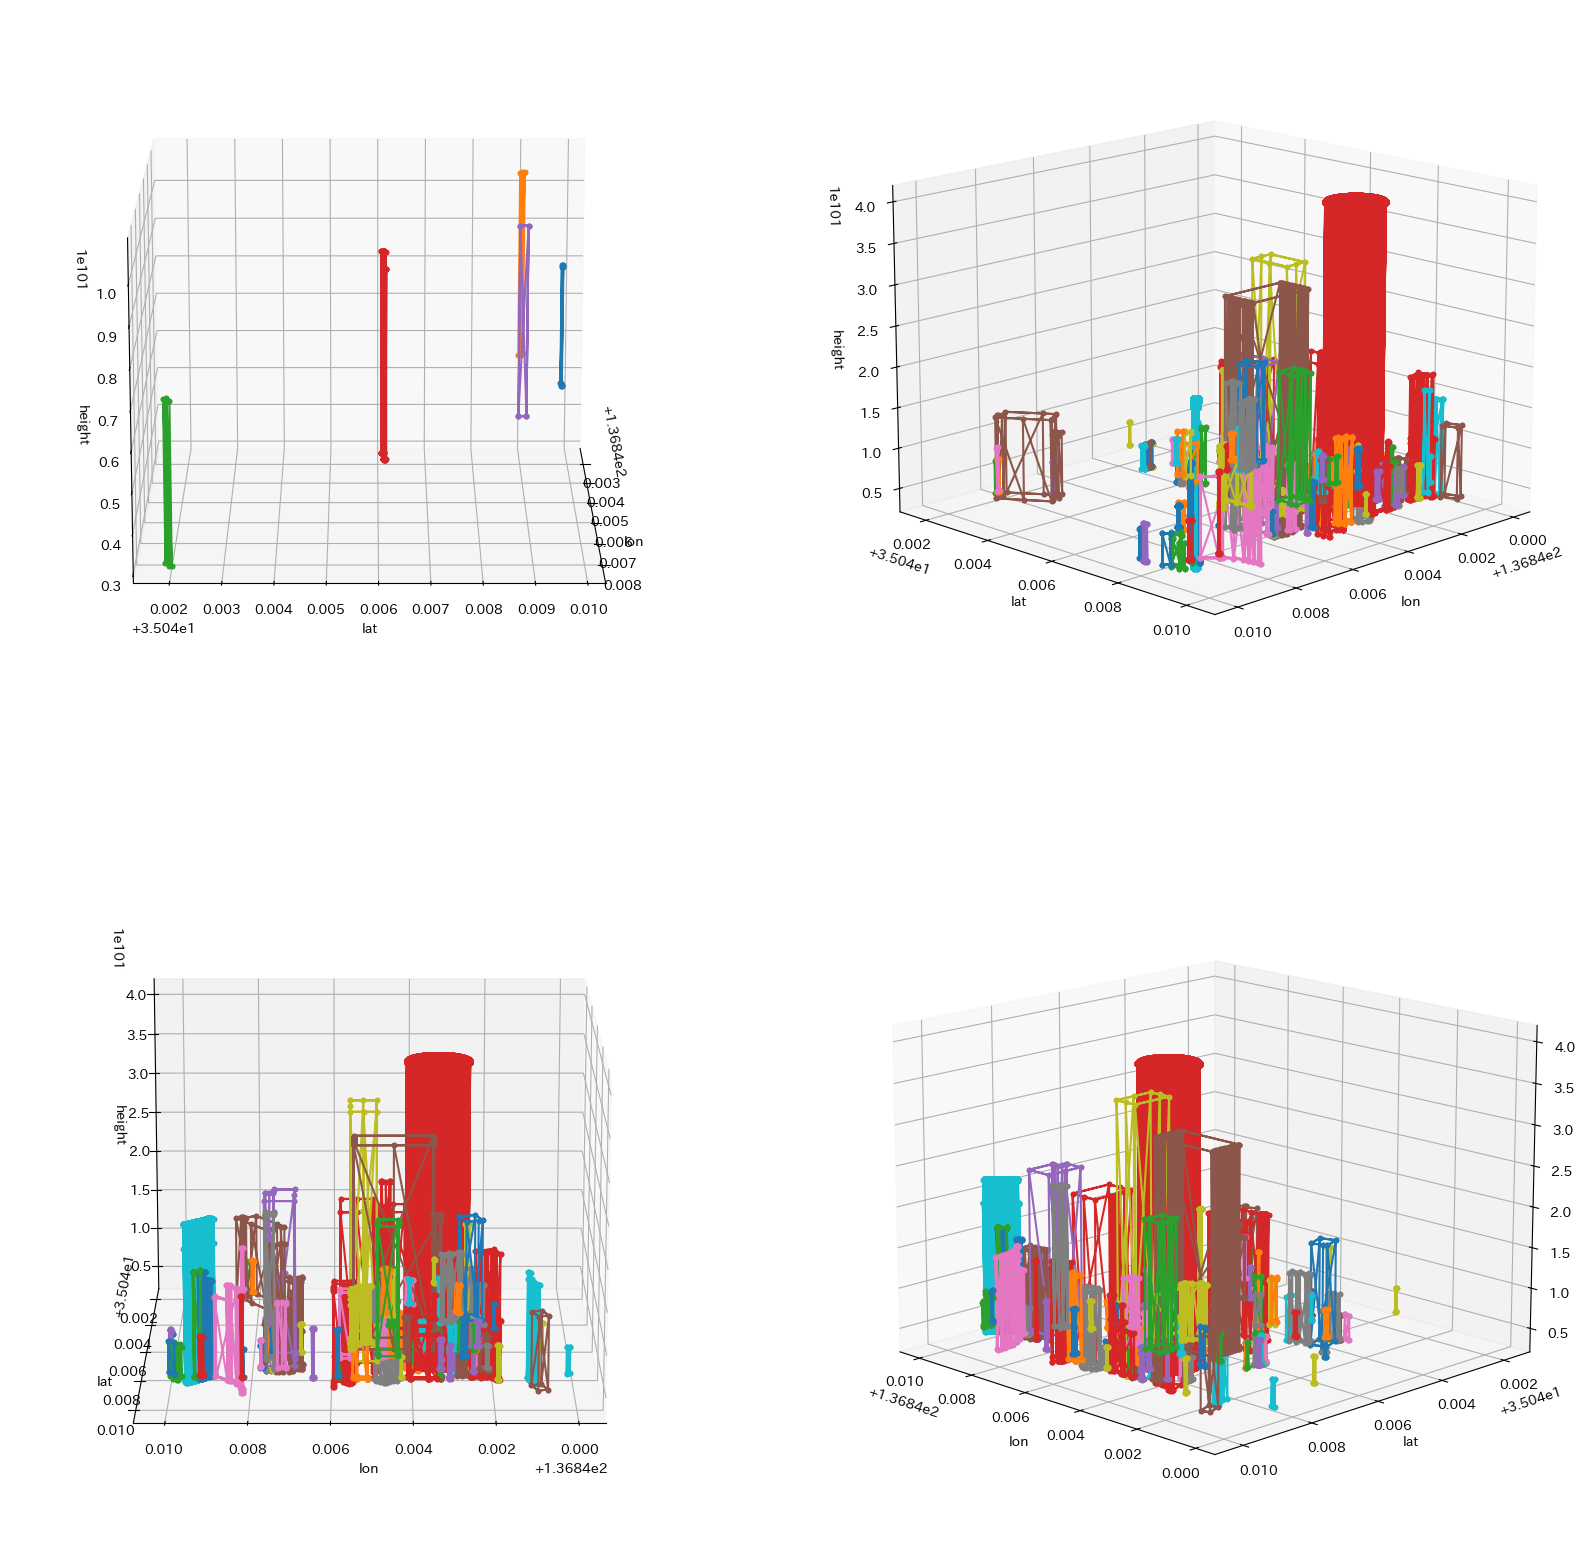

In [38]:
# ../output/building/bldg_0c836439-60bb-4951-a7bf-d057f9cf37e5.csv
dir_path = "../output/52364657_bldg_6697_op/building/"
files = os.listdir(dir_path)

# lat と lon で散布図を描く
fig = plt.figure(figsize=(20, 20))
n = 0

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    for file in files:
        df = pd.read_csv(dir_path + file)
        lod_1_df = df[df['lod'] == 1]
        ax.plot(lod_1_df['lon'], lod_1_df['lat'],lod_1_df['height']/1e-100, '.-')
        n += 1
        if n == 5:
            break
    ax.set_xlabel('lon')
    ax.set_ylabel('lat')
    ax.set_zlabel('height')
    ax.view_init(azim=0+i*45, elev=15)

plt.show()